In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Load your CSVs (replace 'YourData.csv' and 'OtherTeamData.csv' with actual file paths)
my_game_data = pd.read_csv("CupGameData2.csv")
other_team_data = pd.read_csv("OtherTeamData2.csv")

# Merge the datasets on the 'Name' column
merged_data = pd.merge(my_game_data, other_team_data, on="Name", how="inner")

# Step 3: Extract quantitative data for merged analysis
quantitative_data = merged_data[["Name", "Time(s)", "Cups in 30 secs"]]

# Display the first few rows of the merged data
print(quantitative_data.head())


      Name  Time(s)  Cups in 30 secs
0  Anvitha    39.20              4.0
1  Archini    26.04              3.0
2   Dahryn    29.58              4.0
3  Dhanush    32.82              4.0
4    Donny    35.24              3.0


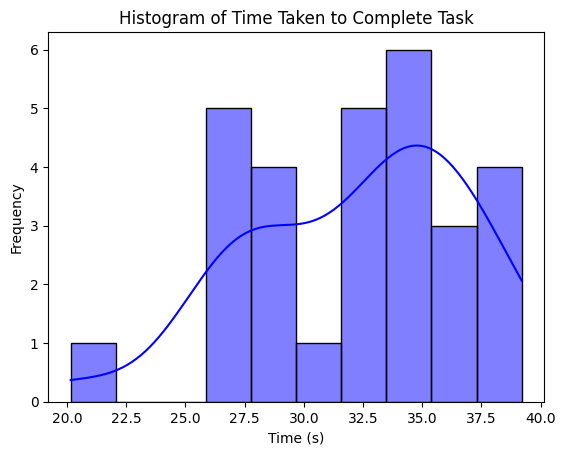

In [ ]:
# Histogram of My game data
# Use your dataset for histogram of Time(s)
sns.histplot(data=my_game_data, x="Time(s)", bins=10, kde=True, color="blue", edgecolor="black")
plt.title("Histogram of Time Taken to Complete Task")
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.show()


<ipython-input-4-8a097da08ab1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=my_game_data, x="Did you play an instrument for more than 2 years?", y="Time(s)", palette="pastel")


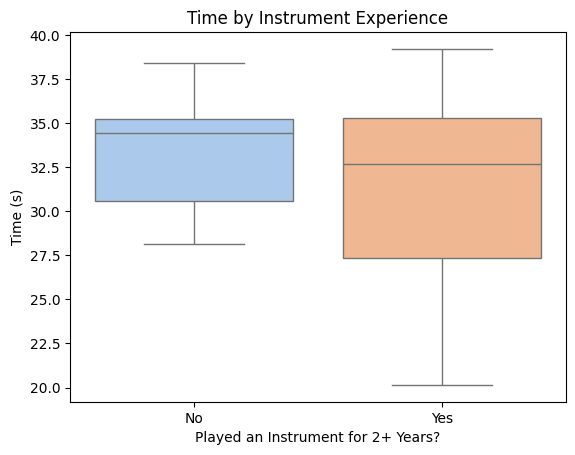

In [ ]:
# Step 5: Boxplot for "Time(s)" by "Did you play an instrument for more than 2 years?"
sns.boxplot(data=my_game_data, x="Did you play an instrument for more than 2 years?", y="Time(s)", palette="pastel")
plt.title("Time by Instrument Experience")
plt.xlabel("Played an Instrument for 2+ Years?")
plt.ylabel("Time (s)")
plt.show()

<ipython-input-5-8191748e7e06>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=my_game_data, x="Name your favorite sport", palette="muted", order=my_game_data["Name your favorite sport"].value_counts().index)


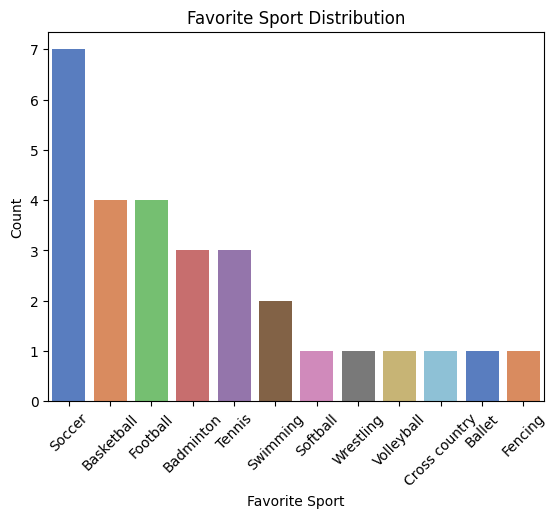

In [ ]:
# Step 6: Bar chart for "Name your favorite sport"
sns.countplot(data=my_game_data, x="Name your favorite sport", palette="muted", order=my_game_data["Name your favorite sport"].value_counts().index)
plt.title("Favorite Sport Distribution")
plt.xlabel("Favorite Sport")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

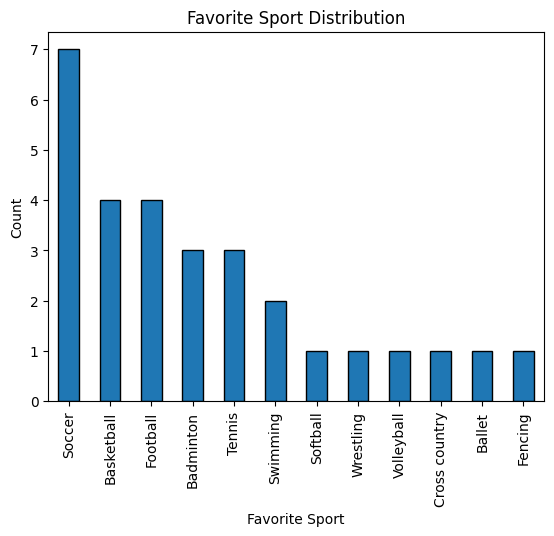

,Name your favorite sport,Count
0,Soccer,7
1,Basketball,4
2,Football,4
3,Badminton,3
4,Tennis,3
5,Swimming,2
6,Softball,1
7,Wrestling,1
8,Volleyball,1
9,Cross country,1


In [ ]:
# 3. Categorical Variable Analysis

# Counts for "Name your favorite sport"
sport_counts = my_game_data["Name your favorite sport"].value_counts()

# Bar chart for "Name your favorite sport"
sport_counts.plot(kind="bar", edgecolor="black")
plt.title("Favorite Sport Distribution")
plt.xlabel("Favorite Sport")
plt.ylabel("Count")
plt.show()

sport_counts.reset_index(name="Count").rename(columns={"index": "Favorite Sport"})


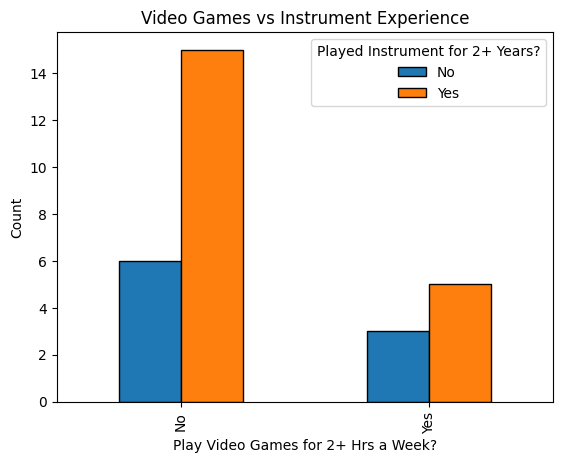

Did you play an instrument for more than 2 years?,No,Yes,Row Totals
Do you play video games for 2+ Hrs a week,,,
No,6,15,21
Yes,3,5,8
Column Totals,9,20,29


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming my_game_data is already defined as a DataFrame
contingency_table = pd.crosstab(
    my_game_data["Do you play video games for 2+ Hrs a week"],
    my_game_data["Did you play an instrument for more than 2 years?"],
)

# Marginal distributions
row_totals = contingency_table.sum(axis=1)
column_totals = contingency_table.sum(axis=0)

# Add Row Totals to the DataFrame
contingency_table["Row Totals"] = row_totals

# Add Column Totals to the DataFrame using pd.concat
column_totals_with_total = pd.concat([column_totals, pd.Series({"Row Totals": row_totals.sum()})])
contingency_table.loc["Column Totals"] = column_totals_with_total

# Side-by-side bar graph (excluding totals row and column for clarity)
contingency_table.iloc[:-1, :-1].plot(kind="bar", stacked=False, edgecolor="black")
plt.title("Video Games vs Instrument Experience")
plt.xlabel("Play Video Games for 2+ Hrs a Week?")
plt.ylabel("Count")
plt.legend(title="Played Instrument for 2+ Years?")
plt.show()

# Displaying the contingency table
contingency_table


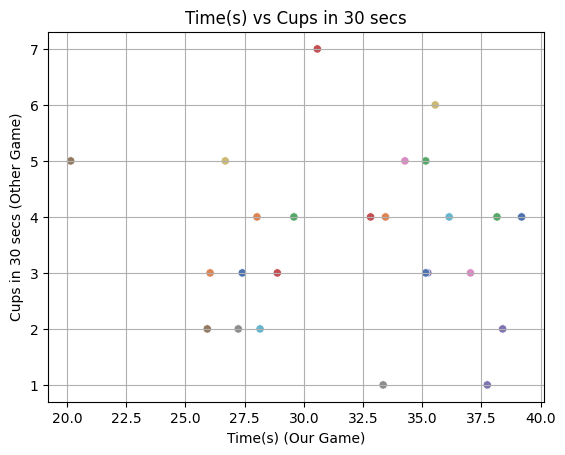

In [ ]:
# Step 7: Scatterplot for "Time(s)" vs. "Cups in 30 secs"
sns.scatterplot(data=quantitative_data, x="Time(s)", y="Cups in 30 secs", hue="Name", palette="deep", legend=False)
plt.title("Time(s) vs Cups in 30 secs")
plt.xlabel("Time(s) (Our Game)")
plt.ylabel("Cups in 30 secs (Other Game)")
plt.grid(True)
plt.show()

Regression Equation: y = -0.02x + 4.17
Correlation Coefficient (r): -0.06406643188044416
Coefficient of Determination (R^2): 0.004104507693891591


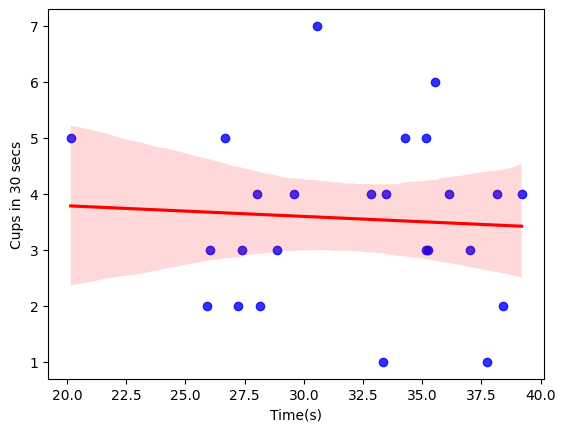

In [ ]:
# Step 8: Linear regression analysis
x = quantitative_data["Time(s)"]
y = quantitative_data["Cups in 30 secs"]
slope, intercept, r_value, p_value, std_err = linregress(x, y)
equation = f"y = {slope:.2f}x + {intercept:.2f}"
r_squared = r_value**2

sns.regplot(x=x, y=y, scatter=True, color="blue", line_kws={"color": "red"})

# Print regression results
print(f"Regression Equation: {equation}")
print(f"Correlation Coefficient (r): {r_value}")
print(f"Coefficient of Determination (R^2): {r_squared}")

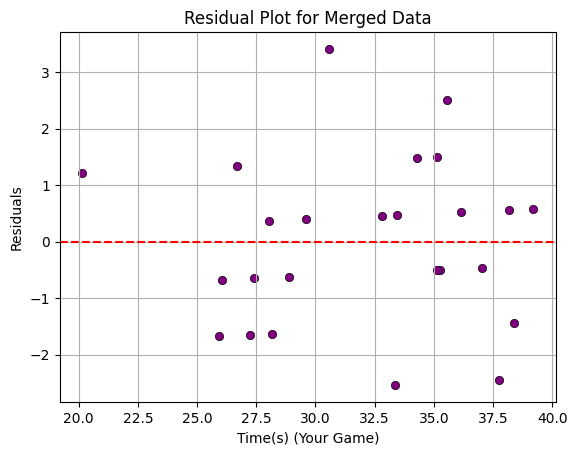

Observed: 4.0, Predicted: 3.42, Residual: 0.58


In [ ]:
# Step 9: Residual plot
residuals = y - (slope * x + intercept)
sns.scatterplot(x=x, y=residuals, color="purple", edgecolor="black")
plt.axhline(0, color="red", linestyle="--")
plt.title("Residual Plot for Merged Data")
plt.xlabel("Time(s) (Your Game)")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Step 10: Calculate one residual
observed = y.iloc[0]  # Actual value for the first participant
predicted = slope * x.iloc[0] + intercept  # Predicted value based on the model
residual = observed - predicted
print(f"Observed: {observed}, Predicted: {predicted:.2f}, Residual: {residual:.2f}")
